
Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:

1.	Qual dos cenários tem a maior taxa de conversão?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import seaborn as sns

In [ ]:
exp = pd.read_csv('/content/3Y4055IzRpmglCCFLtQR_experimento_teste_ab.csv')
exp.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [ ]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
exp.isnull().sum()

,0
Visitante_ID,0
Versão_Página,0
Visualizações,0
Conversões,0


In [ ]:
total_a = exp[(exp['Versão_Página'] == 'A') & (exp['Conversões'] == 1)].shape[0]
total_a

105

In [ ]:
total_b = exp[(exp['Versão_Página'] == 'B') & (exp['Conversões'] == 1)].shape[0]
total_b
print('O cenário com a maior taxa de conversão foi o da Versão B, com um total de {} conversões, contra {} conversões de A'.format(total_b, total_a))

O cenário com a maior taxa de conversão foi o da Versão B, com um total de 125 conversões, contra 105 conversões de A


2.	Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a.	O cenário A, da base, como o inicial, que funciona hoje.

b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05)

c.	Também considere 80% de certeza conseguir capturar o efeito da nova abordagem

d.	O aumento para 10% de conversão.


In [ ]:
exp_a = exp.loc[exp['Versão_Página'] == 'A']
exp_b = exp.loc[exp['Versão_Página'] == 'B']
exp_a.describe()

,Visitante_ID,Visualizações,Conversões
count,1000.000000,1000.000000,1000.000000
mean,500.500000,150.835000,0.105000
std,288.819436,28.951372,0.306707
min,1.000000,100.000000,0.000000
25%,250.750000,126.000000,0.000000
50%,500.500000,152.000000,0.000000
75%,750.250000,176.000000,0.000000
max,1000.000000,199.000000,1.000000


In [ ]:
var_a = exp_a['Conversões'].var()

In [ ]:
total_a_por = exp[exp['Versão_Página'] == 'A'].shape[0]
atual =total_a/total_a_por
atual #taxa de conversão atual 10%

0.105

In [ ]:
#margem de erro
#z = valor da estatistica para o nivel de significancia 95%
a = 0.05
#calculou para mim o valor de alfa
alpha = stats.norm.ppf(1-a/2)
#Z (1-beta) poder do teste
b = 0.2
#bibilioteca calculou valor de beta para mim com esse poder de teste
beta = stats.norm.ppf(1-b)
#variancia
var = 2*var_a
#atual
nova = atual*(1+0.10)
delta = (nova - atual)**2 #o q eu espero MDE

In [ ]:
n = (((alpha + beta)**2)*var)/delta
tamanho_total = n*2
print('O tamanho da amostra é de {}'.format(tamanho_total))

O tamanho da amostra é de 26787.730062414492


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

3.	Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.



In [ ]:
hosp = pd.read_csv('/content/bSUbICXvRgKh4cxgK8IL_pacientes.csv')
hosp.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [ ]:
hosp['Nome_Estado_Saude'].unique()

array(['Com condições de saúde adicionais', 'Saudável'], dtype=object)

In [ ]:
hosp.isna().sum()

,0
Unnamed: 0,0
Pressao_Arterial,0
Idade,0
Genero,0
Etnia,0
Estado_Saude,0
Nome_Genero,0
Nome_Etnia,0
Nome_Estado_Saude,0


In [ ]:
#nível de significancia = 5% - probabilidade de rejeitar uma hipótese nula quando ela é verdadeira
#tendo a media populacional, podemos usar o teste t de student

# Lista dos índices fornecidos
indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756,
           358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
           146, 505, 273, 957, 362]

# Filtra o DataFrame para incluir apenas os índices fornecidos
hosp_amostra = hosp.loc[indices]

# Filtra a amostra para incluir apenas as pessoas com "Condições de saúde adicionais"
hosp_amostra_filtrada = hosp_amostra[hosp_amostra['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']

# Extraí as idades das pessoas filtradas
amostra_final = hosp_amostra_filtrada['Idade']

# Calcula a média da amostra filtrada
media_amostra = amostra_final.mean()

# Parâmetros do teste z
mu_0 = 50  # Média hipotética da população
desvio_populacional = hosp['Idade'].std()  # Desvio padrão da população
n = len(amostra_final)
alpha = 0.05  # Nível de significância

# Estatística do teste z
z_stat = (media_amostra - mu_0) / (desvio_populacional / (n ** 0.5))

# Valor crítico para o nível de significância de 5%
z_critico = stats.norm.ppf(1 - alpha)

# p-valor
p_valor = 1 - stats.norm.cdf(z_stat)

# Resultados
print(f"Média amostral: {media_amostra:.2f}")
print(f"Desvio padrão populacional: {desvio_populacional:.2f}")
print(f"Estatística z: {z_stat:.2f}")
print(f"Valor crítico z: {z_critico:.2f}")
print(f"p-valor: {p_valor:.4f}")

# Decisão
if z_stat > z_critico:
    print("Rejeitamos H0: A média da idade é maior que 50 anos.")
else:
    print("Não rejeitamos H0: Não há evidências suficientes para afirmar que a média da idade é maior que 50 anos.")


Média amostral: 48.16
Desvio padrão populacional: 11.68
Estatística z: -0.69
Valor crítico z: 1.64
p-valor: 0.7540
Não rejeitamos H0: Não há evidências suficientes para afirmar que a média da idade é maior que 50 anos.


4.	Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?


In [ ]:
sem_saude =hosp[hosp['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']
com_saude = hosp[hosp['Nome_Estado_Saude'] == 'Saudável']
#São grupos independentes

In [ ]:
hosp.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


5.	Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.


In [ ]:
indices_dois = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Filtrar o DataFrame com base nos índices
amostra = hosp.iloc[indices_dois]

# Separar os grupos
grupo_condicoes = amostra[amostra['Estado_Saude'] == 1]['Pressao_Arterial']  # Com condições
grupo_saudaveis = amostra[amostra['Estado_Saude'] == 0]['Pressao_Arterial']  # Saudáveis

# Calcular médias e desvios padrão
media_condicoes = grupo_condicoes.mean()
media_saudaveis = grupo_saudaveis.mean()
desvio_condicoes = grupo_condicoes.std(ddof=1)
desvio_saudaveis = grupo_saudaveis.std(ddof=1)

n_condicoes = len(grupo_condicoes)
n_saudaveis = len(grupo_saudaveis)

# Estatística do teste t
t_stat, p_valor = stats.ttest_ind(grupo_condicoes, grupo_saudaveis, equal_var=False)

# Nível de significância
alpha = 0.06

# Resultados
print(f"Média Pressão Arterial (Com Condições): {media_condicoes}")
print(f"Média Pressão Arterial (Saudáveis): {media_saudaveis}")
print(f"Estatística t: {t_stat}")
print(f"p-valor: {p_valor}")

# Tomando a decisão
if p_valor < alpha:
    print("Rejeitamos H0: A pressão arterial média é diferente.")
else:
    print("Não rejeitamos H0: Não há evidências suficientes para afirmar que as médias são diferentes.")

Média Pressão Arterial (Com Condições): 153.19725449805927
Média Pressão Arterial (Saudáveis): 152.94305165531088
Estatística t: 0.08304391716460979
p-valor: 0.9345291578970931
Não rejeitamos H0: Não há evidências suficientes para afirmar que as médias são diferentes.


6. Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.

b. Hipótese Alternativa (H1): Há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população.


In [ ]:
etnia = hosp.groupby('Nome_Etnia')['Pressao_Arterial'].mean()
print(etnia)

Nome_Etnia
Afro-americano    150.727553
Asiático          150.330899
Caucasiano        149.983045
Hispânico         150.419697
Name: Pressao_Arterial, dtype: float64


In [ ]:
afro = hosp[hosp['Nome_Etnia'] == 'Afro-americano']['Pressao_Arterial']
asi = hosp[hosp['Nome_Etnia'] == 'Asiático']['Pressao_Arterial']
cauc = hosp[hosp['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']
hisp = hosp[hosp['Nome_Etnia'] == 'Hispânico']['Pressao_Arterial']

In [ ]:
from scipy.stats import f_oneway
stat, p_value = f_oneway(afro,asi,cauc,hisp)

# Exibindo os resultados
print(f"ANOVA: Estatística F = {stat:.4f}, Valor p = {p_value:.4f}")

# Avaliando o resultado
if p_value < 0.05:
    print("Há uma diferença estatisticamente significativa entre as médias da pressão arterial de acordo com a etnia.")
else:
    print("Não há uma diferença estatisticamente significativa entre médias da pressão arterial de acordo com a etnia.")

ANOVA: Estatística F = 0.2325, Valor p = 0.8738
Não há uma diferença estatisticamente significativa entre médias da pressão arterial de acordo com a etnia.


7.	Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)



In [ ]:
#Nome_Genero Nome_Estado_Saude
fem = hosp[hosp['Nome_Genero'] == 'Feminino']['Nome_Estado_Saude']
masc = hosp[hosp['Nome_Genero'] == 'Masculino']['Nome_Estado_Saude']
contingencia = pd.crosstab(hosp['Nome_Genero'], hosp['Nome_Estado_Saude'])
print(contingencia)

Nome_Estado_Saude  Com condições de saúde adicionais  Saudável
Nome_Genero                                                   
Feminino                                         257       246
Masculino                                        253       244


In [ ]:
chi2, p, dof, expected = chi2_contingency(contingencia)
#Results
print(f"Qui-Quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Tabela Esperada:")
print(expected)
print('O p value foi muito maior que 0.05, ou seja, No qui quadrado quer dizer que não há associação entre gêneros e estado de saúde')

Qui-Quadrado: 0.0
p-valor: 1.0
Graus de liberdade: 1
Tabela Esperada:
[[256.53 246.47]
 [253.47 243.53]]
O p value foi muito maior que 0.05, ou seja, No qui quadrado quer dizer que não há associação entre gêneros e estado de saúde


8. Existe uma associação entre a idade dos pacientes e sua pressão
arterial?

a. Hipótese Nula (H0): se a pressão arterial é independente da idade

b. Hipótese Alternativa (H1): a pressão arterial esta associada a
idade


In [ ]:
#separar a idade em faixas
idade_maxima = hosp['Idade'].max()
idade_minima = hosp['Idade'].min()
idade_maxima, idade_minima

(70, 30)

In [ ]:
#de 30 a 70 anos, separo de 10 em 10?
bins = [30, 40, 50, 60, 70,100]  # Definindo limites para as categorias
labels = ['0 - 30', '31 - 40', '41 - 50', '51-60', '60+']  # Nomes das categorias
hosp['Faixa_Idade'] = pd.cut(hosp['Idade'], bins=bins, labels=labels, right=False) #construindo uma coluna nova

In [ ]:
grupo_0_30 = hosp[hosp['Faixa_Idade'] == '0 - 30']['Pressao_Arterial']
grupo_31_40 = hosp[hosp['Faixa_Idade'] == '31 - 40']['Pressao_Arterial']
grupo_41_50 = hosp[hosp['Faixa_Idade'] == '41 - 50']['Pressao_Arterial']
grupo_51_60 = hosp[hosp['Faixa_Idade'] == '51-60']['Pressao_Arterial']
grupo_60_plus = hosp[hosp['Faixa_Idade'] == '60+']['Pressao_Arterial']

In [ ]:
#Pressao_Arterial	Idade ANOVA
age = hosp['Idade']
press = hosp['Pressao_Arterial']
from scipy.stats import f_oneway

stat, p_value = f_oneway(grupo_0_30,grupo_31_40,grupo_41_50,grupo_51_60,grupo_60_plus)

# Exibindo os resultados
print(f"ANOVA: Estatística F = {stat:.4f}, Valor p = {p_value:.4f}")

# Avaliando o resultado
if p_value < 0.05:
    print("A pressão arterial é dependente da idade")
else:
    print("A pressão arterial é independente da idade")


ANOVA: Estatística F = 0.6534, Valor p = 0.6245
A pressão arterial é independente da idade


9.	Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)


In [ ]:
#como eu tenho mais que 30 amostras, tenho q usar a distribuição Z, intervalo de confiança com N > 30: (stats.norm.interval)
sem_saude_m =hosp[hosp['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']
sem_saude_media = sem_saude_m['Pressao_Arterial'].mean()
desvio_padrao = sem_saude_m['Pressao_Arterial'].std()
n = len(sem_saude_m)
graus = n - 1
erro_padrao = desvio_padrao/ (n**0.5)
intervalo = stats.norm.interval(0.95, loc = sem_saude_media, scale = erro_padrao)
print('O intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais está entre {}'. format(intervalo))

O intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais está entre (149.22186145551754, 151.01504243479755)


10. A distribuição da pressão arterial na população segue uma distribuição
normal?

a. Hipótese Nula (H0): A distribuição da pressão arterial na
população segue uma distribuição normal.

b. Hipótese Alternativa (H1): A distribuição da pressão arterial na
população não segue uma distribuição normal.

In [ ]:
distnormal = hosp['Pressao_Arterial']
# Aplicando o teste de Shapiro-Wilk para o batom 1
stat_um, p_value_um = shapiro(distnormal)
print(f"Teste de Shapiro-Wilk para pressão arterial: Estatística W = {stat_um:.4f}, Valor p = {p_value_um:.4f}")

# Avaliando os resultados
if p_value_um < 0.05:
    print("distribuição da pressão arterial na população não segue uma distribuição normal.")
else:
    print("distribuição da pressão arterial na população segue uma distribuição normal.")


Teste de Shapiro-Wilk para pressão arterial: Estatística W = 0.9970, Valor p = 0.0607
distribuição da pressão arterial na população segue uma distribuição normal.


Text(0.5, 1.0, 'Distribuição da Pressão Arterial')

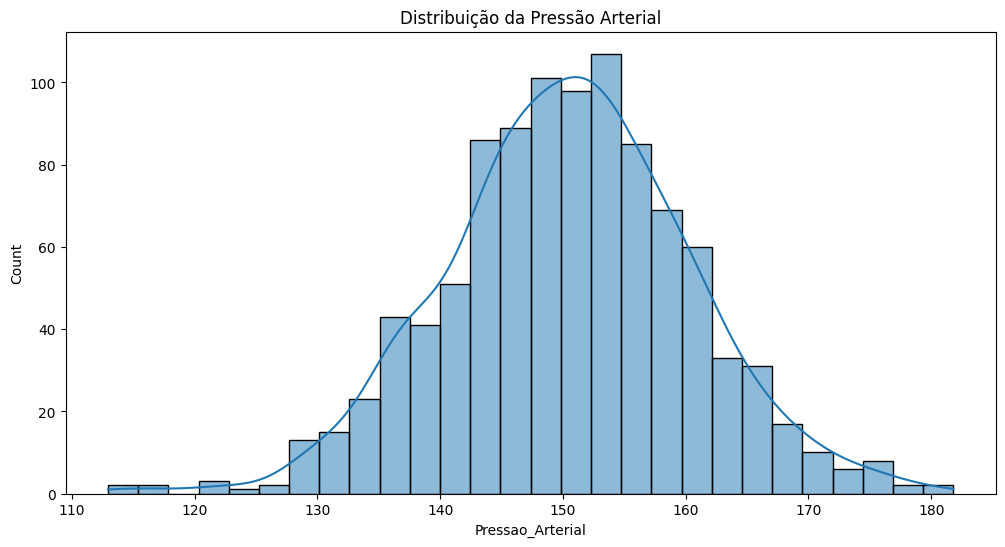

In [ ]:
plt.figure(figsize=(12, 6))
# Gráfico Q-Q
sns.histplot(distnormal, kde=True)
plt.title('Distribuição da Pressão Arterial')